In [14]:
import sys
import os
import SimpleITK
import numpy
import matplotlib.pyplot
import imageio
sys.path.append(os.path.join(os.path.expanduser('~'),'software','src','nixSuite','wrapper'))
import nixWrapper
nixWrapper.loadLibrary('labkeyInterface')
import labkeyInterface
net=labkeyInterface.labkeyInterface()
fconfig=os.path.join(os.path.expanduser('~'),'.labkey','network.json')
net.init(fconfig)
net.getCSRF()
import labkeyFileBrowser
sys.path.append(os.getcwd())
import downloadPatient
fb=labkeyFileBrowser.labkeyFileBrowser(net)
project='dinamic_spect/Patients'
locDir=os.path.join(os.path.expanduser('~'),'temp','dynamicSPECT')
import labkeyDatabaseBrowser
db=labkeyDatabaseBrowser.labkeyDB(net)

/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


User: andrej studen CSRF: 2e2ad486aae3991259a5a9499f48a7dc


/usr/lib/python3/dist-packages/urllib3/connection.py:391: SubjectAltNameWarning: Certificate for merlin.fmf.uni-lj.si has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/urllib3/urllib3/issues/497 for details.)
  warnings.warn(


14
(656, 875, 3)


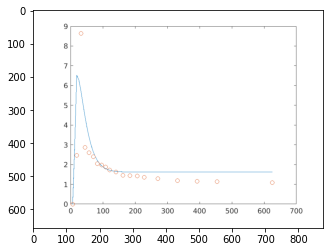

(656, 875, 3)


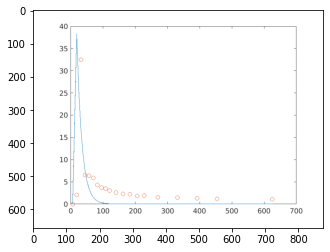

(656, 875, 3)


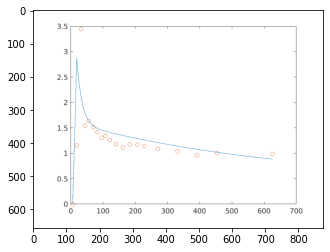

(656, 875, 3)


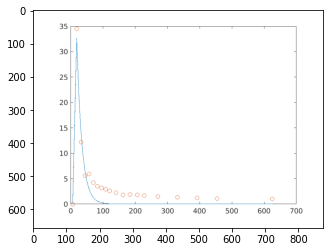

(656, 875, 3)


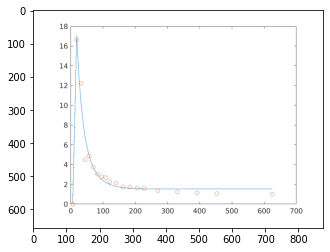

User: andrej studen CSRF: 90dc721765507858188e9664d4a23104
(656, 875, 3)


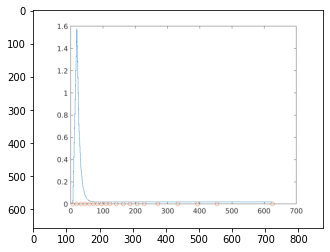

(656, 875, 3)


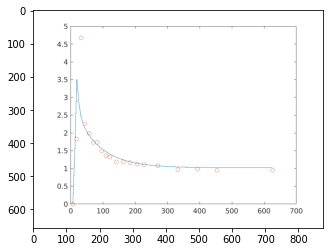

User: andrej studen CSRF: 95145a867bd9007341b2a3147bf460e4
(656, 875, 3)


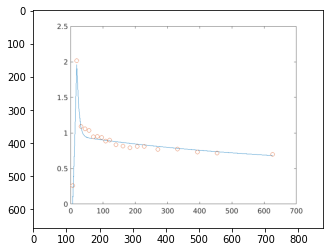

(656, 875, 3)


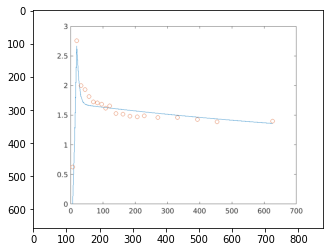

(656, 875, 3)


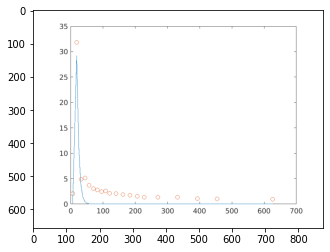

(656, 875, 3)


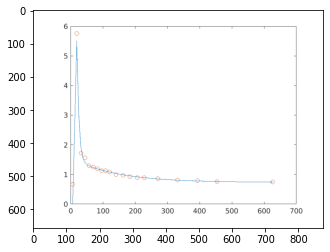

(656, 875, 3)


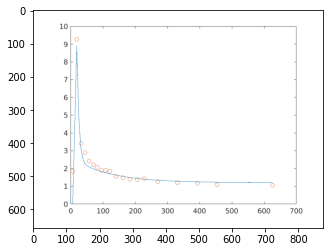

User: andrej studen CSRF: 73b7611429bfdd47eb6bfdf130135ce1
(656, 875, 3)


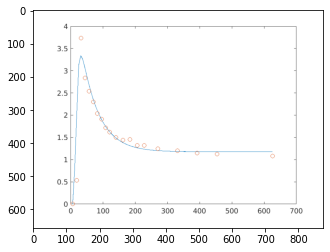

(656, 875, 3)


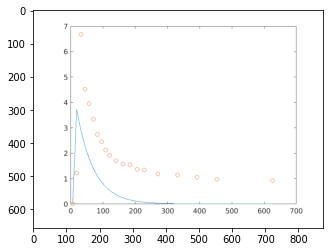

(656, 875, 3)


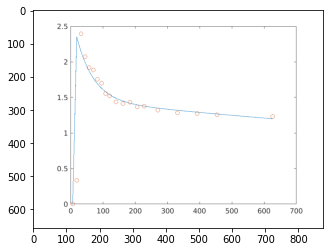

(656, 875, 3)


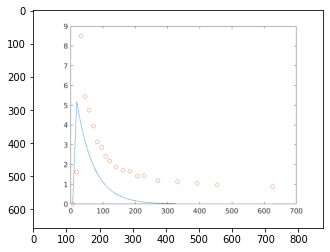

(656, 875, 3)


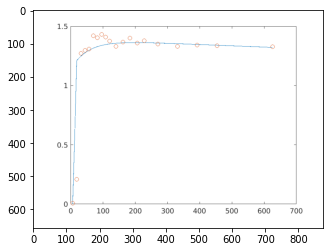

(656, 875, 3)


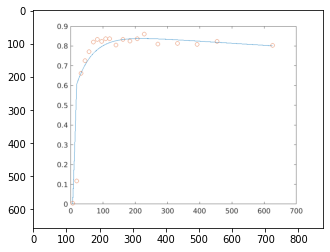

User: andrej studen CSRF: c484448a0bbdf80d335cd97c2332133e
(656, 875, 3)


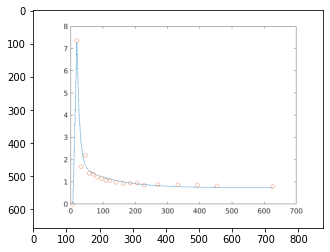

(656, 875, 3)


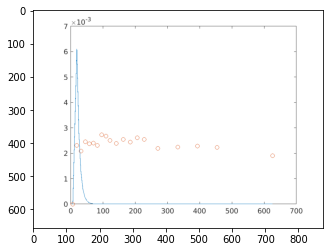

(656, 875, 3)


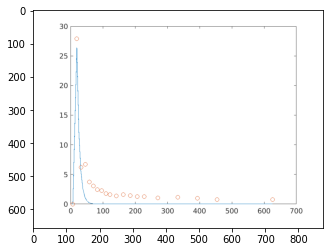

(656, 875, 3)


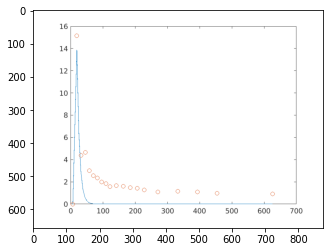

(656, 875, 3)


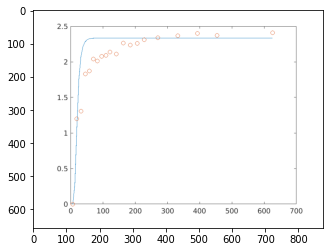

(656, 875, 3)


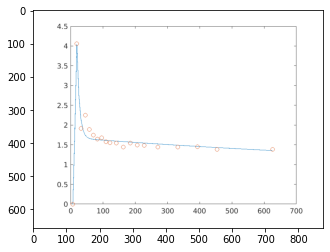

User: andrej studen CSRF: 5f920112e2329782b7434c6997a79daa
(656, 875, 3)


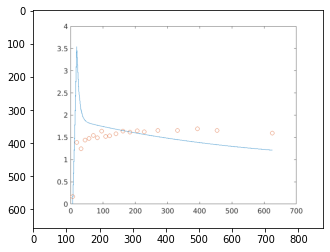

(656, 875, 3)


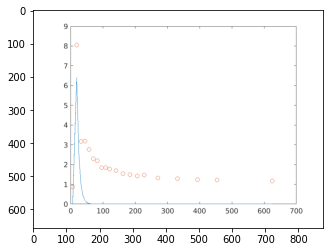

(656, 875, 3)


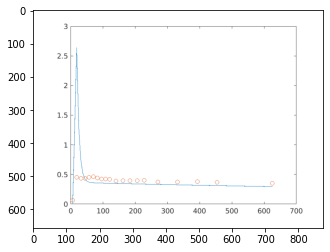

(656, 875, 3)


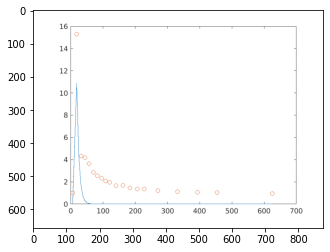

(656, 875, 3)


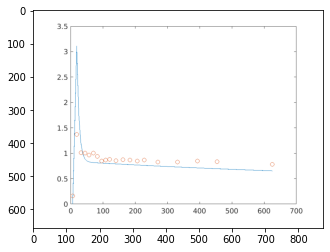

User: andrej studen CSRF: e2a882f47ef755dad6a66a01c48de50a
(656, 875, 3)


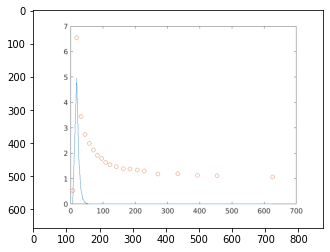

(656, 875, 3)


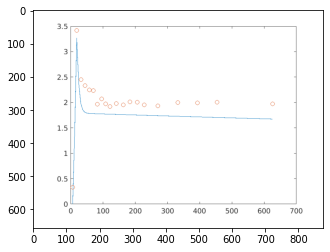

(656, 875, 3)


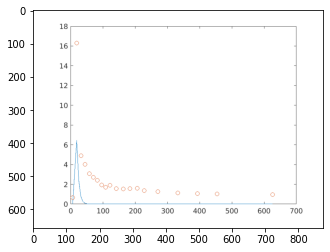

(656, 875, 3)


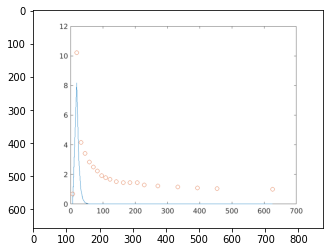

User: andrej studen CSRF: 24c95498d8a757a96f608eeb437630b5
(656, 875, 3)


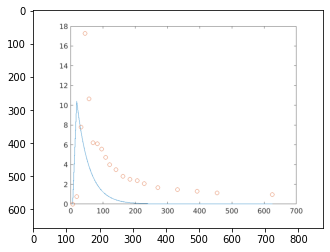

(656, 875, 3)


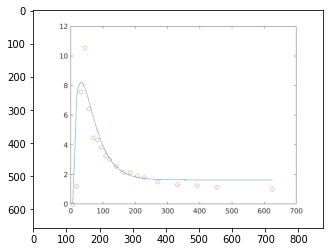

(656, 875, 3)


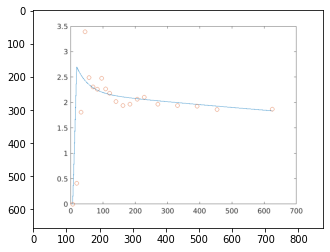

User: andrej studen CSRF: 229d509661adfb65595cc2602e568145
(656, 875, 3)


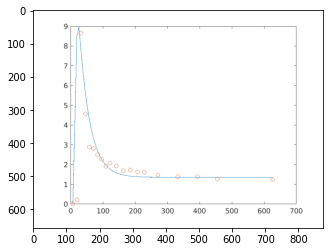

(656, 875, 3)


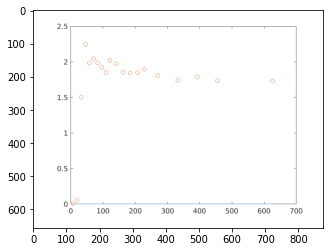

(656, 875, 3)


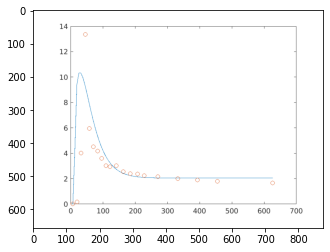

(656, 875, 3)


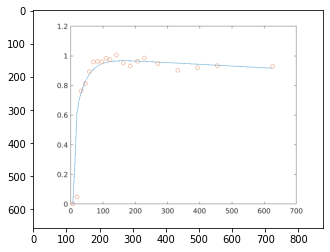

(656, 875, 3)


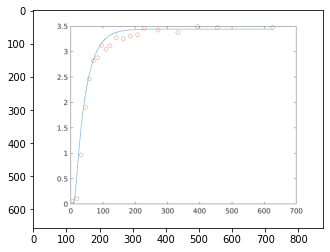

User: andrej studen CSRF: 337b60b744c3aa70557066f5308d0e1e
(656, 875, 3)


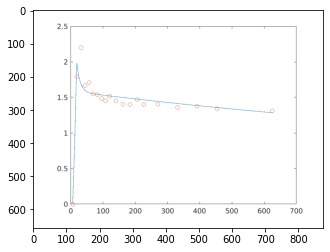

(656, 875, 3)


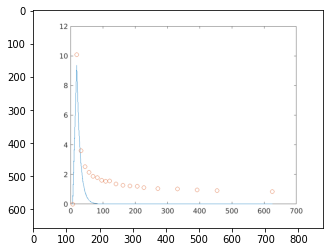

(656, 875, 3)


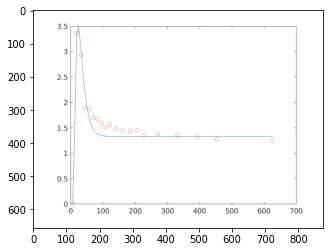

(656, 875, 3)


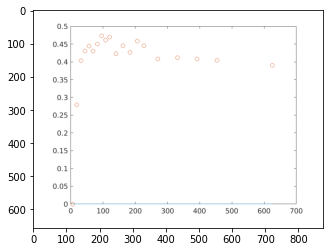

(656, 875, 3)


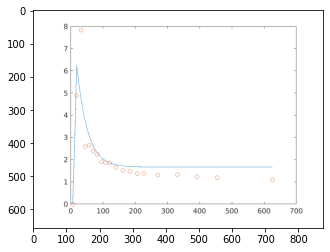

User: andrej studen CSRF: a23bb15c3488b0ee5a79124c0725a7c5
(656, 875, 3)


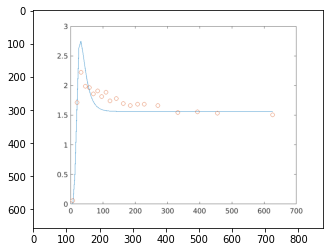

(656, 875, 3)


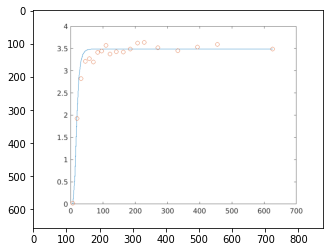

(656, 875, 3)


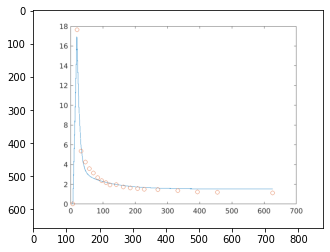

(656, 875, 3)


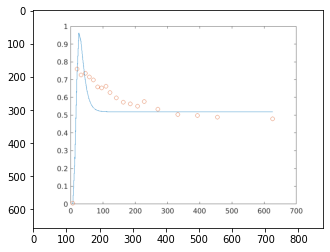

User: andrej studen CSRF: af71a46371356ba77a358491f0931d64
(656, 875, 3)


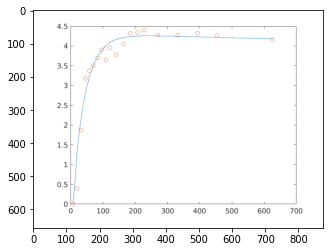

(656, 875, 3)


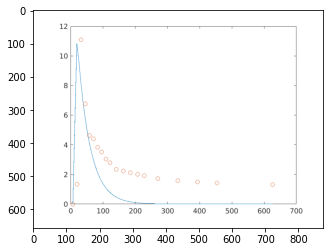

(656, 875, 3)


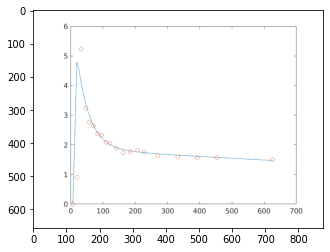

(656, 875, 3)


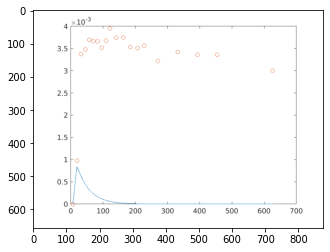

(656, 875, 3)


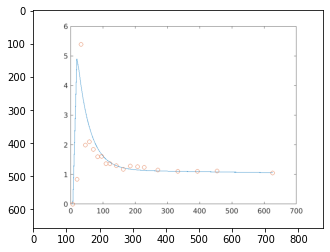

(656, 875, 3)


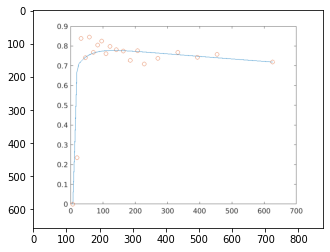

User: andrej studen CSRF: 8b4e7238e39701a63c3c528ef8955f3e


In [58]:
ds=db.selectRows(project,'study','Imaging',[])
patients=list(set([row['aliasID'] for row in ds['rows']]))
print(len(patients))

patients1=[patients[11]]
for pId in patients:
    if pId.find('8')==0:
        continue
    r=[row for row in ds['rows'] if row['aliasID']==pId][0]
    segmFile=os.path.join(locDir,pId,pId+'_Segm.nrrd')
    imS=SimpleITK.ReadImage(segmFile)
    nS=SimpleITK.GetArrayFromImage(imS)
    
    fUnit=numpy.ones(nS.shape)
    
    idFilter={'variable':'PatientId','value':r['PatientId'],'oper':'eq'}
    dsQ=db.selectRows(project,'study','ImagingData',[idFilter])
    regionIds=[int(r['regionId']) for r in dsQ['rows']]
    
    nCenter=[]
    maxCenter=[]
    for i in numpy.arange(10):
        centerFile=os.path.join(locDir,pId,pId+'_center'+str(i+1)+'.nrrd')
        imCenter=SimpleITK.ReadImage(centerFile)
        nCenter.append(SimpleITK.GetArrayFromImage(imCenter))
    
    for region in regionIds:
        vs=[]
        for i in numpy.arange(10):
            vc=nCenter[i][nS==region]
            val=numpy.sum(vc)
            #print('[{}]: reg {} center {}: {}'.format(pId,region,i,numpy.sum(vc)))
            vs.append(val)
        #print('{}/{}'.format(numpy.max(vs),numpy.argmax(vs)))
        maxCenter.append(numpy.argmax(vs))
    
    maxCenter=list(set(maxCenter))
    mc=[str(x) for x in maxCenter]
    r['centers']=';'.join(mc)
    
    for i in maxCenter:
        im = imageio.imread(os.path.join(locDir,pId,'centers'+str(i+1)+'.png'))
        print(im.shape)
        matplotlib.pyplot.imshow(im)
        matplotlib.pyplot.show()
        
    db.modifyRows('update',project,'study','Imaging',[r])
        
                                
        
                                
        
    